In [ ]:
import pandas as pd
import seaborn as sns
from google.colab import files

In [ ]:
files.upload()

Saving satisfaction_score.csv to satisfaction_score.csv
Saving customer_comments.csv to customer_comments.csv
Saving service_pre_order.csv to service_pre_order.csv
Saving service_inventory.csv to service_inventory.csv


In [ ]:
#read csv files
score = pd.read_csv('satisfaction_score.csv')
comments = pd.read_csv('customer_comments.csv')
pre_order = pd.read_csv('service_pre_order.csv')
inventory = pd.read_csv('service_inventory.csv')

#change to common column names
comments.rename(columns = {'destination_station_code':'arrival_station_code'}, inplace = True)
score.rename(columns = {'destination_station_code':'arrival_station_code'}, inplace = True)
inventory.rename(columns = {'departure_station_code': 'origin_station_code'}, inplace = True)
pre_order.rename(columns = {'departure_station_code': 'origin_station_code'}, inplace = True)
comments.rename(columns = {'scheduled_departure_date': 'scheduled_departure_dtl'}, inplace = True)
score.rename(columns = {'scheduled_departure_date': 'scheduled_departure_dtl'}, inplace = True)

In [ ]:
unique_key = ['flight_number', 'origin_station_code', 'arrival_station_code', 'record_locator','scheduled_departure_dtl']
score_pre_order_merge = pd.merge(score, pre_order, on=unique_key, how='inner')


<Axes: xlabel='cabin_code_desc', ylabel='Count'>

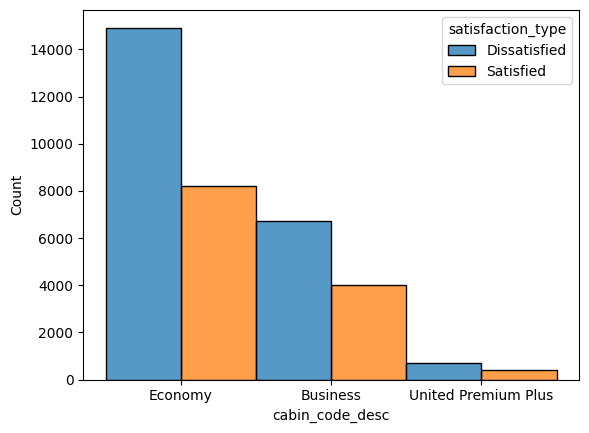

In [ ]:
# Plot multiple columns in a line graph
first_dimension = "cabin_code_desc"
horizontal_label = "x label"
second_dimension = "satisfaction_type"

sns.histplot(binwidth=1,
            x=first_dimension,
            hue=second_dimension,
            data=score,
            stat="count",
            multiple="dodge")

*the plot bewteen satisfaction score and cabin code shows that mostly Economy class cabin passengers are dissatisfied in compare to Business cabin passengers as the dissatisfaction-satisfaction ratio in economy class cabin is way more than that of Business class cabin.*

<Axes: xlabel='generation', ylabel='Count'>

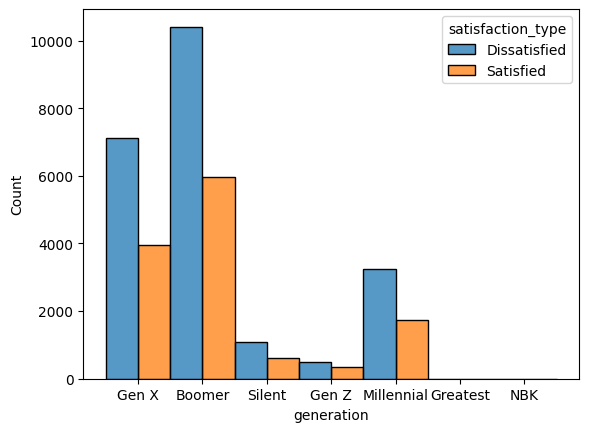

In [ ]:
# Plot Generation on Satisfation level
first_dimension = "generation"
horizontal_label = "x label"
second_dimension = "satisfaction_type"

sns.histplot(binwidth=1,
            x=first_dimension,
            hue=second_dimension,
            data=score,
            stat="count",
            multiple="dodge")

*Above plot shows that among age group 41-75 or above are mostly dissatisfied or unhappy customer and have lot more complains than those of age group 18-40*

<Axes: xlabel='x label', ylabel='meal_category'>

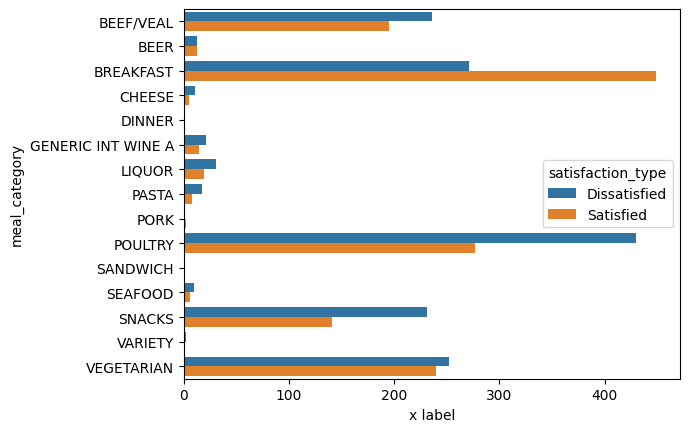

In [ ]:
# Plot Generation on Satisfation level
first_dimension = "meal_category"
horizontal_label = "x label"
second_dimension = "satisfaction_type"

sns.barplot(x=horizontal_label,
            y=first_dimension,
            hue=second_dimension,
            data=score_pre_order_merge.groupby([first_dimension, second_dimension]).size().to_frame(horizontal_label).reset_index())